# Enjoy  BabyEnv

See observation data, action space and all stuff contained in BabyEnv

In [1]:
import gym
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import baby.envs
from baby.envs.baby_env import default_conf

In [2]:
# Create env
env = gym.make('baby-v0')

In [3]:
# Check observation space
env.observation_space

Box(9, 21, 21)

In [4]:
# Check action space
env.action_space

Discrete(189)

In [5]:
# See full configuration
print(json.dumps(env.conf, indent=4))

{
    "seed": 0,
    "n_frame": 20,
    "n-xaxis": 21,
    "n-yaxis": 9,
    "max_episode_iteration": 1000,
    "alpha_ground_truth": 0.8,
    "validation_threshold": 0.8,
    "sigma_prediction": 0.5,
    "gamma_gaussian_value": 0.2,
    "sigma_gaussian_value": 0.8,
    "reward": {
        "timestep": 0,
        "validation": 1
    }
}


In [6]:
env.conf['sigma_prediction'] = 0.5
env.conf['gamma_gaussian_value'] = 0.2
env.conf['sigma_gaussian_value'] = 0.8

### Ground-truth
Ground truth are matrix generated with numpy random and filter gaussian 
in oder to have geographical consistency between frames

In [7]:
# Take first n frames
n=10

env.reset()
first_frame_truth = env.ground_truth[:, :, :n]
first_frame_truth = np.swapaxes(first_frame_truth, axis1=-1, axis2=0)

Frame #0 | shape=(21, 9)


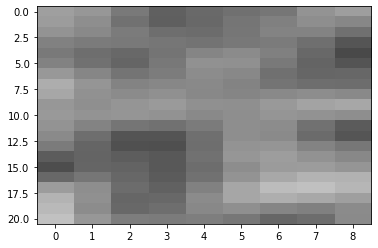

Frame #1 | shape=(21, 9)


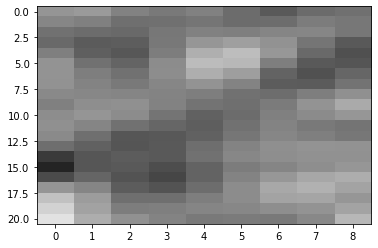

Frame #2 | shape=(21, 9)


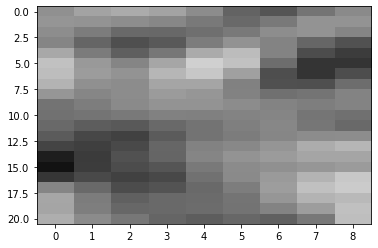

Frame #3 | shape=(21, 9)


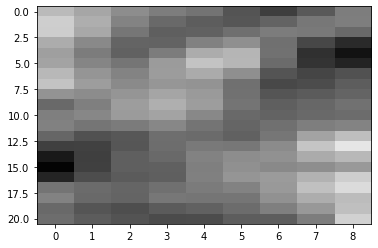

Frame #4 | shape=(21, 9)


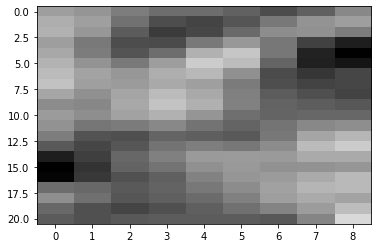

Frame #5 | shape=(21, 9)


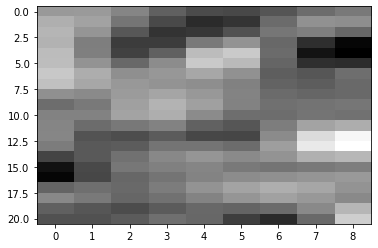

Frame #6 | shape=(21, 9)


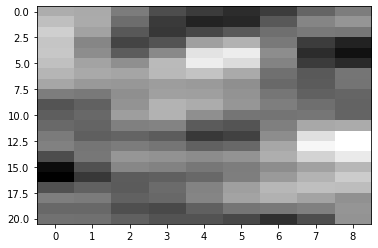

Frame #7 | shape=(21, 9)


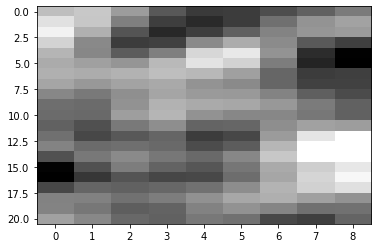

Frame #8 | shape=(21, 9)


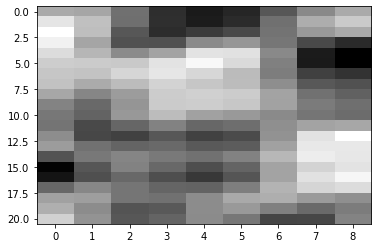

Frame #9 | shape=(21, 9)


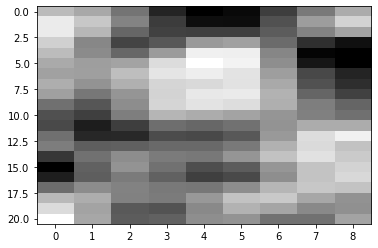

In [8]:
for num, frame in enumerate(first_frame_truth):
    print(f"Frame #{num} | shape={frame.shape}")
    
    # For visual representation flip vertical axis
    frame_repr = np.flip(frame, axis=0)
    
    # Show into notebook in grayscale
    plt.imshow(frame, cmap='gray', vmin=0.0, vmax=1.0, interpolation='nearest', aspect='auto')
    plt.show()

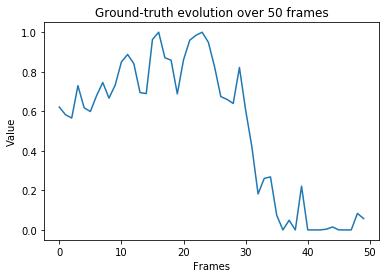

In [9]:
# Visual evolution of a single point (0, 0) over n frames
n=50
truth_evo = env.ground_truth[0, 0, :n]
plt.plot(truth_evo)
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.show()

In [10]:
# Overall statistics over frames
print(f"Mean ground truth: {np.mean(env.ground_truth)}")
print(f"Std deviation ground truth: {np.std(env.ground_truth)}")

Mean ground truth: 0.5163241333509733
Std deviation ground truth: 0.30487247723217065


## Impact of alpha_ground_truth on ground truth evolution
Modifying conf to see different options

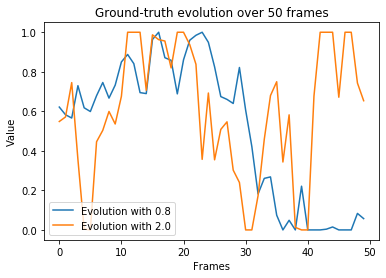

In [11]:
stored_ground_truth_prev_value = np.copy(env.ground_truth[0, 0, :n])
origin_alpha = env.conf['alpha_ground_truth']
env.conf['alpha_ground_truth'] = 2.0

# Reset ground truth
env.reset()

plt.plot(stored_ground_truth_prev_value, label=f"Evolution with {origin_alpha}")
plt.plot(env.ground_truth[0, 0, :n], label=f"Evolution with {env.conf['alpha_ground_truth']}")
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
# Restore old value
env.conf['alpha_ground_truth'] = origin_alpha

## Forecast compared to ground-truth

In [13]:
def show_prediction_ground_truth():
    obs = env.reset()
    print(f"Show pred/truth with sigma={env.conf['sigma_prediction']}")

    plt.figure(figsize=obs.shape[:2])
    columns = 2
    
    t=0
    i_plt = 0

    for i in range(0,env.conf['n_frame']):
        error = obs[:, :, i] - env.ground_truth[:, :, t]
        print(f"Frame {i} // Mean error = {np.mean(error)} // std = {np.std(error)}")
        
        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(obs[:,:,i], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1

        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(env.ground_truth[:,:,t], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1
        
        t=i+1
        

Show pred/truth with sigma=0.5
Frame 0 // Mean error = 0.005100048590206219 // std = 0.020058994511648942
Frame 1 // Mean error = -0.002732614131534485 // std = 0.03893841687923829
Frame 2 // Mean error = 0.005067363263972226 // std = 0.06243690983778924
Frame 3 // Mean error = -0.009289841696106223 // std = 0.06631496887672123
Frame 4 // Mean error = 0.0033741247489841642 // std = 0.08615779651678344
Frame 5 // Mean error = 0.010442719639364419 // std = 0.11063752175484937
Frame 6 // Mean error = 0.0022723753375902974 // std = 0.11597796426342666
Frame 7 // Mean error = 5.592763044487385e-05 // std = 0.13267359214708527
Frame 8 // Mean error = -0.006094322072728537 // std = 0.14359895859794128
Frame 9 // Mean error = 0.025714303724410498 // std = 0.16079670529350198
Frame 10 // Mean error = -0.006501792812977501 // std = 0.16946863852176097
Frame 11 // Mean error = -0.021680439868273428 // std = 0.18105088650273807
Frame 12 // Mean error = 0.00841554394494684 // std = 0.18266107374970

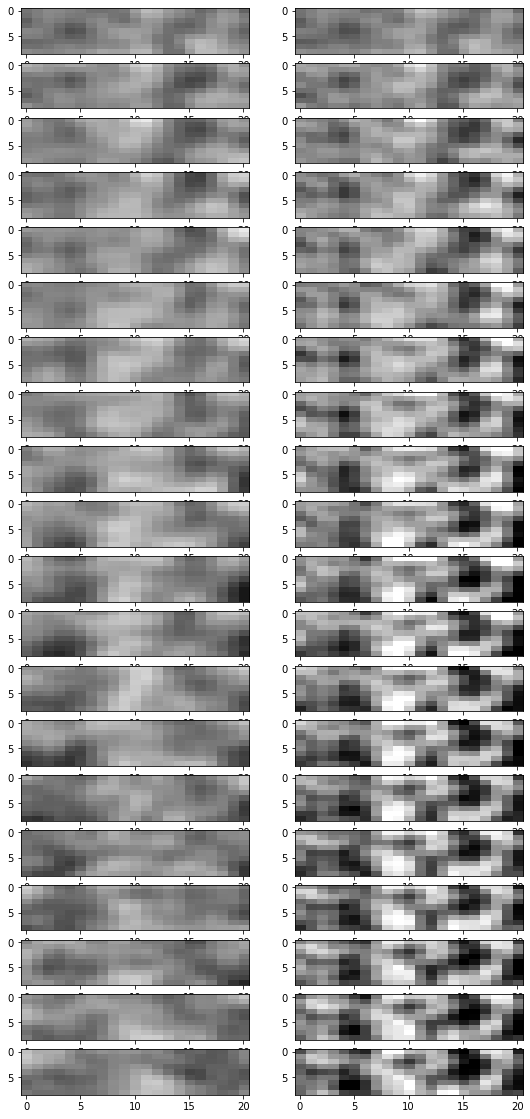

In [14]:
# Show with initial configuration
show_prediction_ground_truth()

Show pred/truth with sigma=1.0
Frame 0 // Mean error = 0.020181206542470274 // std = 0.09581396968628351
Frame 1 // Mean error = 0.016381250579113653 // std = 0.15647770003896236
Frame 2 // Mean error = 0.016821318389083385 // std = 0.17336724560648123
Frame 3 // Mean error = 0.07378796506283374 // std = 0.24370298417474787
Frame 4 // Mean error = 0.021377081325960653 // std = 0.21175362665705963
Frame 5 // Mean error = -0.01990878778051621 // std = 0.2646664555158199
Frame 6 // Mean error = -0.036106385223419864 // std = 0.2711732159692074
Frame 7 // Mean error = -0.05156502104250421 // std = 0.33557507958391025
Frame 8 // Mean error = -0.08092926203565398 // std = 0.31344163383959683
Frame 9 // Mean error = -0.0011949556845229842 // std = 0.30287566859602433
Frame 10 // Mean error = -0.029155184192239843 // std = 0.3634723553766839
Frame 11 // Mean error = 0.02951309421802791 // std = 0.3638049816671631
Frame 12 // Mean error = 0.009291064054011932 // std = 0.3757691950486833
Frame 1

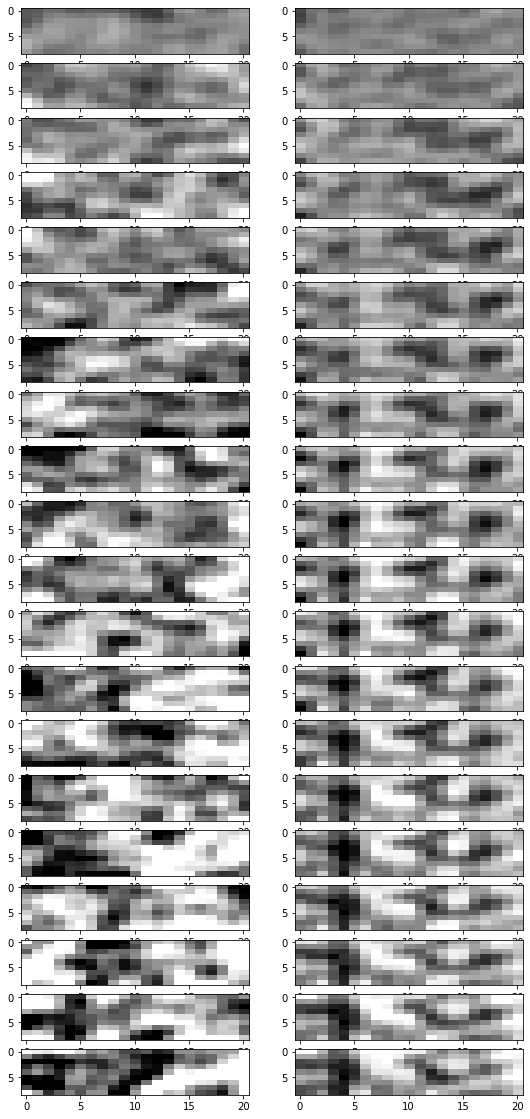

In [24]:
original_sigma=env.conf['sigma_prediction']

env.conf['sigma_prediction'] = 1.0
env.conf['gamma_gaussian_value'] = 1.0

show_prediction_ground_truth()
env.conf['sigma_prediction']=original_sigma